In [ ]:
논문을 보는 이유는 기본지식 + 공부방법. 한분야를 잡을 때.

AlexNet 이 나오면서 딥러닝의 길이 열림. 2012년도에 역사를 바꿀 조짐이 보인 것.
2013년도에 visualization 을 통해서 하이퍼 파라미터 튜닝해서 성능을 올림. -> 2013년 까지는 원래 계속 연구했던 팀들.
성과를 낼 수 있었음.

이후 가장 빠르게 따라잡은 게 구글
그러나 2014년 2등 VGGNet 이 이론적으로 더 탄탄함.

In [ ]:
컨볼루션을 홀수로 하는 이유는, 짝수로 하면 내 주변이 애매하게 보임. 그래서 컨볼루션은 싹다 홀수임. 로컬 정보를 활용하기 위해서 홀수
3, 5, 7 정도를 많이 씀. 그래서 googLeNet 에서도 1,3,5 함.

그런데 VGG 에서 3x3 을 두번 겹치면 5x5, 3번 겹치면 7x7.
장점은 파라미터 작아지고, non-linearity 를 더 활용 가능. 그런데 레이어가 많으면 학습이 잘 안되는 단점이 있음.
이 논문 이후에 거의 모든 애들이 3x3 였음.
VGG 는 3x3 으로 쌓기만 하면 됨. 이후 이걸로 실험 설계를 함. ablation study.
레이어가 커지면? Non-linearity 의 효과? 등등을 공통점을 두어서 밝혀냄

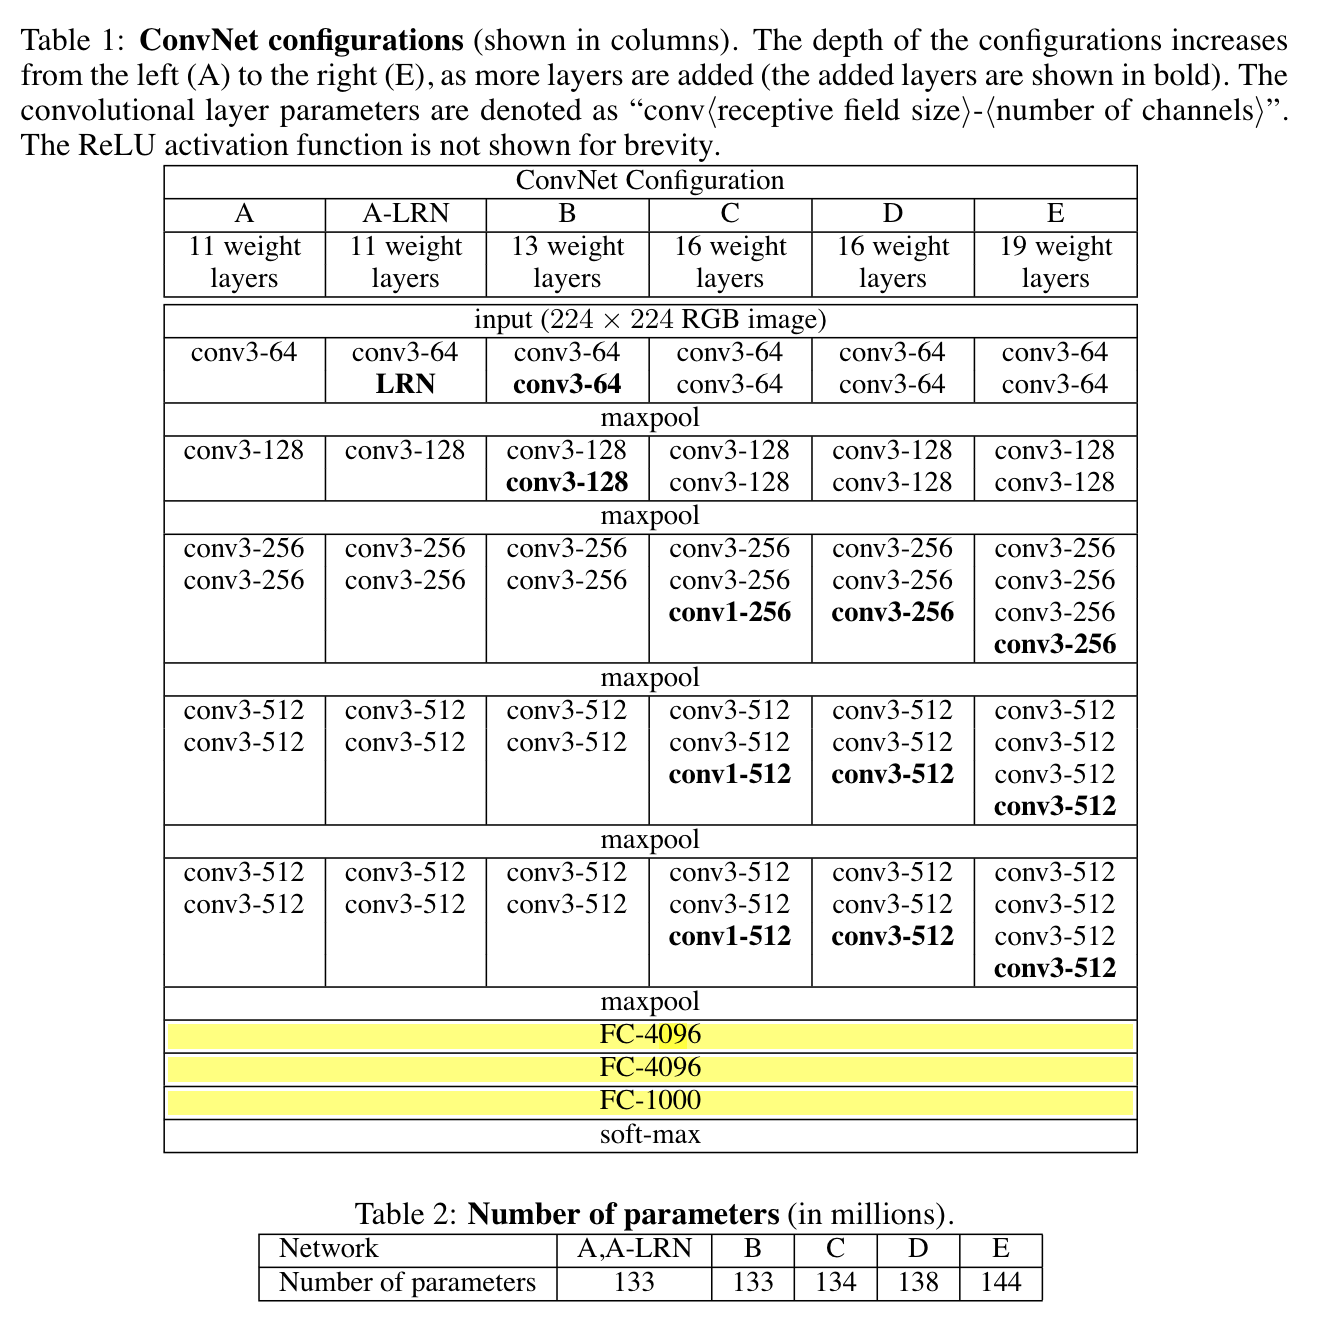

In [ ]:
AlexNet 에서 FC 를 3개 썼으니까 여기서도 FC 를 3개 씀.
이 3개가 엄청난 파라미터의 증가를 불러옴. 모델 크기가 커도 GPU 연산을 하기 때문에 속도는 빠름. 그러나 모델이 크면 가벼운 곳에 탑재 불가함.
VGG 는 엄청 간단함.

In [ ]:
VGG 는 간단해서 여러개 붙혀도 학습 가능함. 다른 복잡한 모델을 백본으로 쓰면 잘 안됨. backbone 쓸 때 가장 잘 되는 것은 VGG 와 ResNet.

In [ ]:
16층과 19층이 별 차이가 없음. 그래서 오캄의 면도날에 의해서 모델을 간단히 유지시키는게 좋음. 그래서 16층의 레이어를 많이 사용함.

성능을 높이기 위한 방법이 많음.

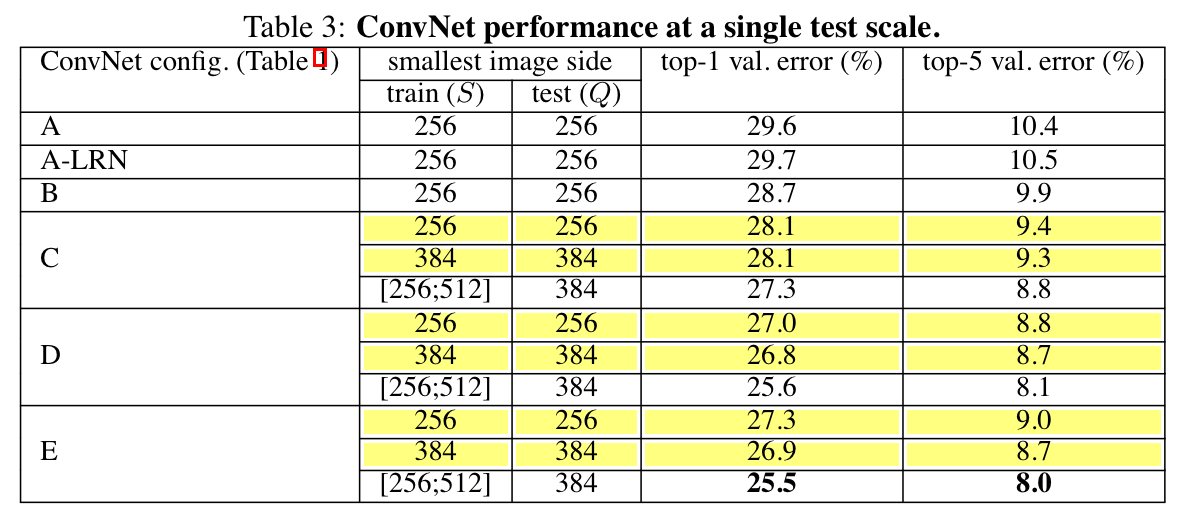

In [ ]:
각 논문마다 학습 파트가 있음.
VGG 에서는 NiN을 잘 안씀. 개념은 멋있었는데 절대적 성능이 안좋았음. 그 당시 VGG 만든 사람들은 NiN 이 잘못됐다고 생각함.
NN은 앙상블을 진짜 많이 씀.
기존에 그대로 기법을 가져온 경우 + 자신의 기법 중 중요한 부분이 아니라서 -> 앙상블을 숨김

VGG는 이런 의미가 있음.
2014년도 대표적 특징은 레이어가 8개에서 16~20 사이로 딥해지고 있음.
왜 레이어를 20개까지밖에 못했을까? 잘 안됐음. 20개 까지는 ReLU 와 기존 학습테크닉을 쓰면 잘됐음.

In [ ]:
2015년도에 들어서서 처음으로 사람을 뛰어넘는 모델이 나오기 시작함. 그 두번째 논문이 ResNet.
SOTA 는 그냥 주장한 것. 검증을 꼭 해야 함.

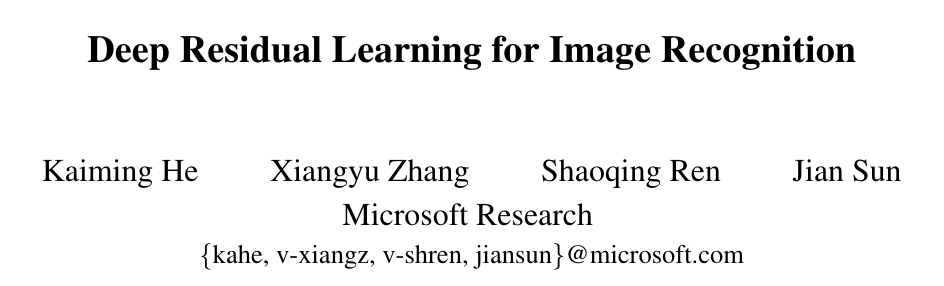

In [ ]:
얘도 Network in Network 의 stacking 하는 기법. 

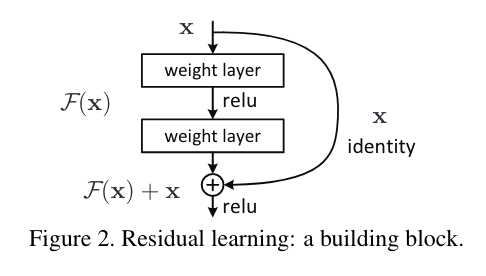

In [ ]:
위 그림을 stacking 함. 잔차(Residual)을 이용함.

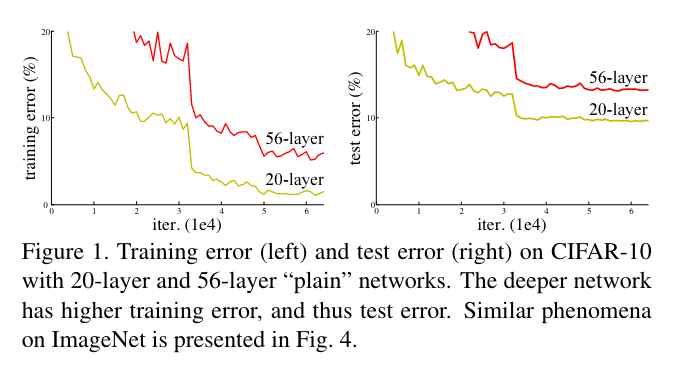

In [ ]:
레이어가 많으면 많을수록 성능이 좋은데 위 그래프에서는 그렇지 않음. 더 많이 쌓으니까 성능이 안 좋음. 그러면 무엇을 의심?
-> 오버피팅을 의심할 수 있음. gradient vanishing 도 의심할 수 있음. 기울기 소실은 그 당시 ReLU 로 어느정도 해결된 줄 알았음.

두번째 그림을 보면 오버피팅 됐는지 안됐는지 알 수 있음. 오버피팅 안되어 있음. 학습보다 test가 성능 안좋은 건 당연함.
즉, 오버피팅 보다는 학습이 잘 안되는, gradient vanishing 문제가 있는 것 같다!

레이어가 많아지면 많아질 수록 값들이 잘 전달이 안되더라! 레이어가 많으니까 성능이 떨어지겠구나 라는 것을 느낌.

이 해결책으로 위에서 stacking 하는 residual 을 활용. 값을 유지시키는 기법. 자기 자신을, identity 를 계속 유지시키기 위해서.
더해지는 x는 작은 값이기 때문에. 완전 새로운 테크닉은 아님. LSTM 맨 위에 있는 것이 이 같은 역할을 함. 자기 자신의 값이 유지되면 내 자신이
소멸이 안됨. 이것을 residual block 이라고 이름을 붙힘. 이것을 stacking 을 함.

In [ ]:
이 ResNet은 NiN 에서 썼던 stacking, global average pooling 을 씀.
이 스태킹구조를 학습시키는 것, 자기 자신을 유지시키는 것이 핵심. shortcut connection

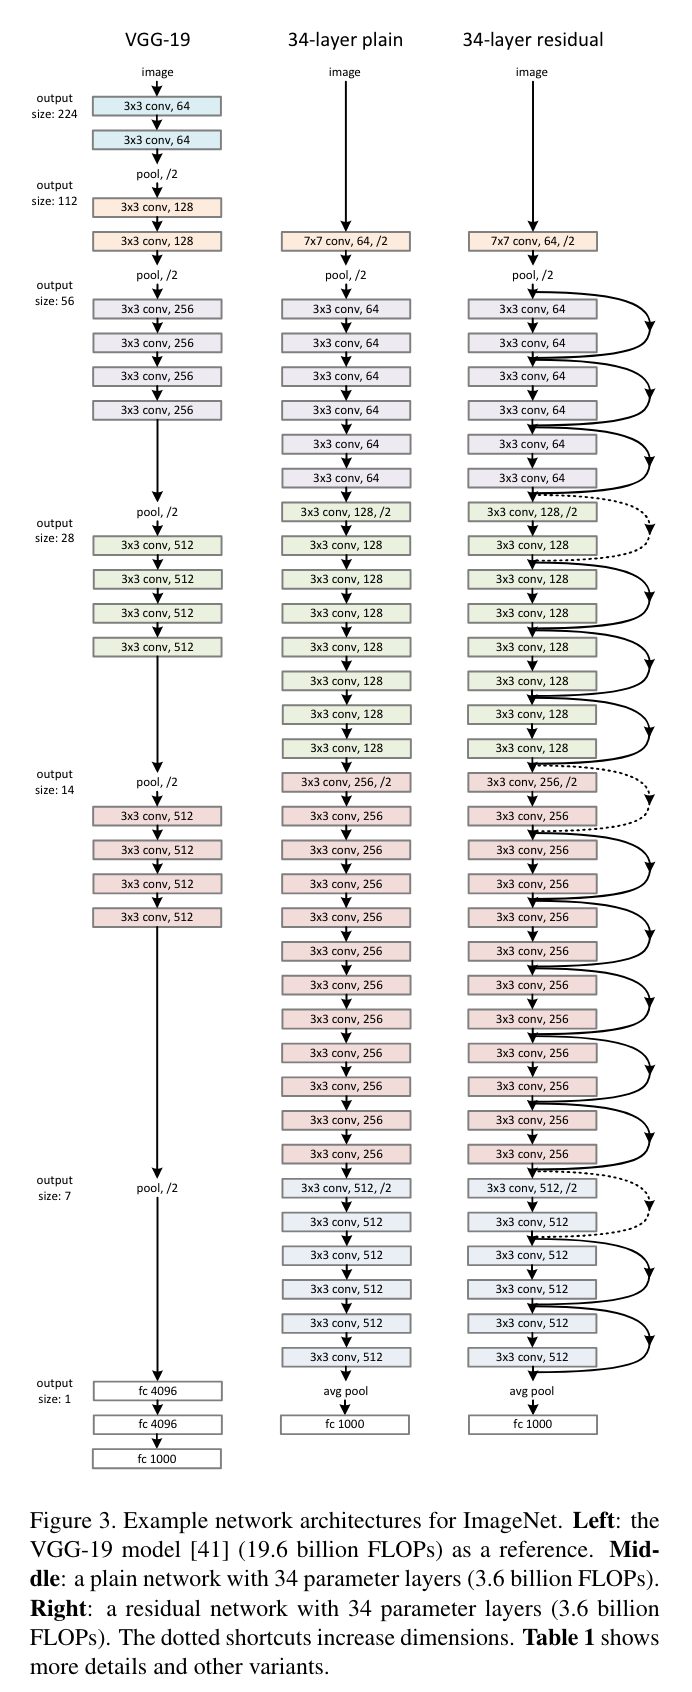

In [ ]:
첫째에서 7x7 stride 2 를 쓰면 두번째에서 확 작아짐. -> 첫번째를 듬성듬성 큰 영역으로 봄. ZFNet. ZFNet 에서 첫번째 레이어에서는 대충의
점,선,면 중요하지 않은 정보를 봄. 듬성듬성 하게 해서 그 다음의 크기를 확 줄여버림. 
pooling 을 쓰면 정보가 없어짐. 가능한 뒤에는 pooling 을 안씀.
그래서 맨 오른쪽은 pooling이 거의 없음.

pooling 은 stride 를 쓰면 안 써도 됨.
한칸씩 이동하는 것을 두 칸씩 이동하면 pooling 없어도 됨. 그게 stride 테크닉
필터 뎁스(채널 개수)가 커질 때마다 씀
2의 배수로 쓰는 것은 GPU 할당에 유리하기 위해서.

In [ ]:
pooling 을 안써서 생기는 장점 -> equivalance 한 속성 대신 invariance 가 커져서 눈코입 위치가 달라도 사람으로 보는 그 문제점이 약해짐.

In [ ]:
local response normalization 대신 드디어 batch normalization 이 나옴. 이것은 트랜스포머에도 나옴.
이 batch normalization 을 만든 사람이 인셉션을 만든 사람.
2등한 팀은 local response normalization 이 필요없음을 밝혀내서. 그래서 1등을 했는데 단점이 드러나서 빡침.
그리고 위 ResNet 에서는 dropout 이 없음.

In [ ]:
ResNet의 특징.

ImageNet 대용으로 구현. [21, 41] 관습을 따랐음. 21은 AlexNet, 41은 VGGNet. 앞에 것을 또 가져다 쓴 것.
칼라특성을 잃지 않기 위해서 augmentation 을 씀. 그리고 batch normalization 을 씀. 이 batch normalization 은 지금도 사용하는 테크
닉임. 이 batch normalization 이 실용적으로 잘 됨. 그런데 이론적 근거가 없다는 공격을 많이 받음. batch normalization 에 나온 이론과는
다르게 실제로 구동됨. 그래서 이렇기 때문에 잘될 것이라고 논문을 냈는데 원인이 잘못됨. 그래서 batch normalization 도 rethinking 이 일어남.
다음으로 초기화 테크닉. [13]이 자비에르?
gradient descent 중 가장 간단한 방법인 AlexNet 에서 쓰는 거 계속 함.
논문에서는 batch 사이즈 크기가 256. 256개의 데이터를 동시에 학습에 투입함. 하드웨어가 빵빵함.

batch 사이즈가 작으면 업데이트를 자주함. 잘못된 길이 있으면 바로 길을 틀 수 있지만, 길을 자주 틀기 때문에 학습이 훨씬 더 늦게 됨. 또 한번
구렁텅이에 빠지면 못나올 수 있음.
사이즈가 크면 학습이 빨리 됨. 그런데 이제부터 이슈가 batch 사이즈가 커야함. 100만개 넘는 데이터에서 거기에 4098(FC)을 더 곱해야 함.
그 많은 것을 batch 사이즈를 32로 하면 엄청 오래걸림.

그래서 batch normalization 이 나오고 나서부터 batch 사이즈를 크게할 수 있음.
몰라서는 안되는 테크닉이다!!

In [ ]:
플라토 -> 더이상 성능이 변하지 않을 때 learning rate 를 줄여버림. -> 성능이 어느정도 유지되는 것이 플라토.
AlexNet 에서는 maually 하게 수정함
위 그래프에서 에러율이 갑자기 확 떨어지면 learning rate 를 줄인 것. 이렇게 줄이면 학습을 세밀하게 함.

드랍아웃을 사용 안함. -> batch normalization 논문에 이걸 썼더니 굳이 드랍아웃 사용할 필요 없다는 결과가 있음.
dropout 특징 3가지. 오버피팅 막을 떄, catastropy forgetting, 앙상블 효과. 그런데 이게 학습을 늦추게 하고 batch normalization 과
같이 쓸 때 굳이 효과가 없음.

In [ ]:
더 크게 모델을 만들려 했더니 연산량이 너무 복잡해짐.

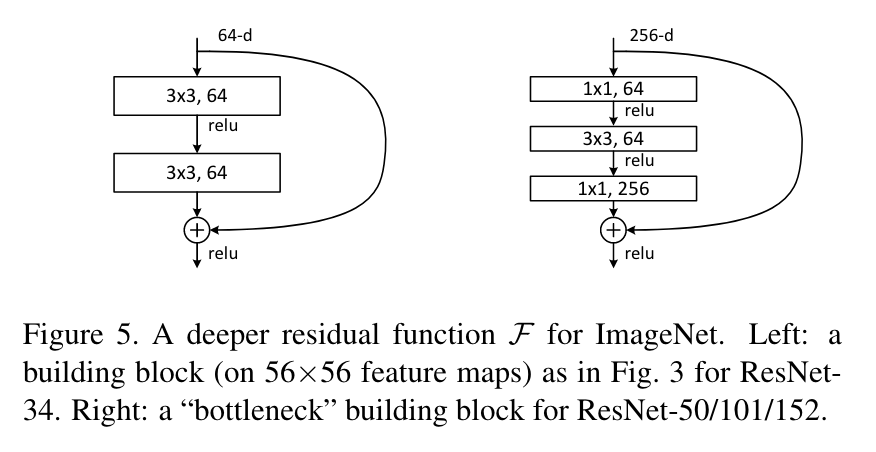

In [ ]:
구글넷 인셉션에서 차원축소하는 용으로 1x1 을 먼저 쓰고 256차원을 연산하는데, 64로 우선 줄이고 3x3 하고나서 다시 1x1으로 256으로 키우는 것이
3x3으로 256 바로 키우는 것보다 연산량이 더 작음. 성능차이는 없음. 그래서 위의 오른쪽 같은 그림

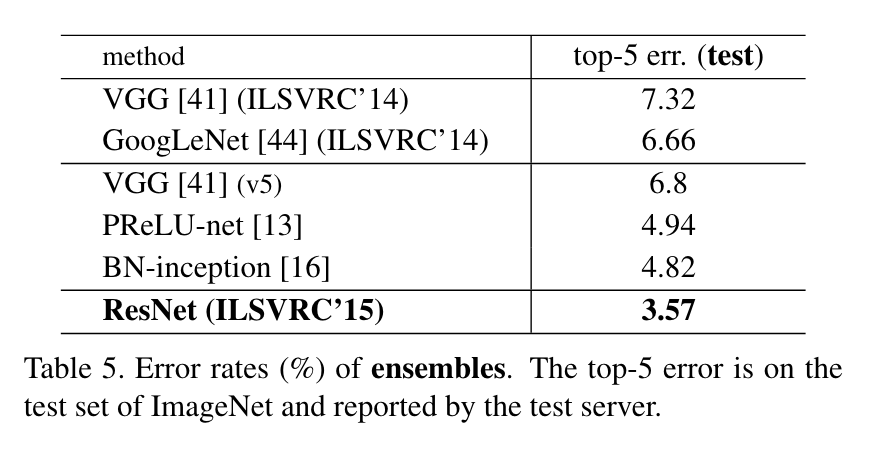

In [ ]:
이 ResNet 도 앙상블을 해서 2015년도에 사람을 뛰어넘음.
앙상블은 너무 큼. 여러개의 모델을 써야 함.
사람을 뛰어넘으니까 이제 연구의 방향이 앙상블을 사용하지 않고, 단일 모델로 사람을 뛰어넘는 것으로 바뀜.
2017년 이후에는 사람을 다 뛰어넘어 버림. 이 기술을 실험실 환경이 아니라, 실질적으로 사용할 수 있도록 경량화의 기술로 바뀜.
2017년부터 경량화에 집중함.

In [ ]:
이 때까지는 사람은 뛰어넘었지만 과도기. 2016년 1등은 안함. 중국애들이 ResNet, Inception 즉 1등한 애들 거 앙상블해서 자기네들이 1등함.
2016년 1등은 건너뛰고, 페이스북에서 제안했던 ResNeXt 모델이 나옴.

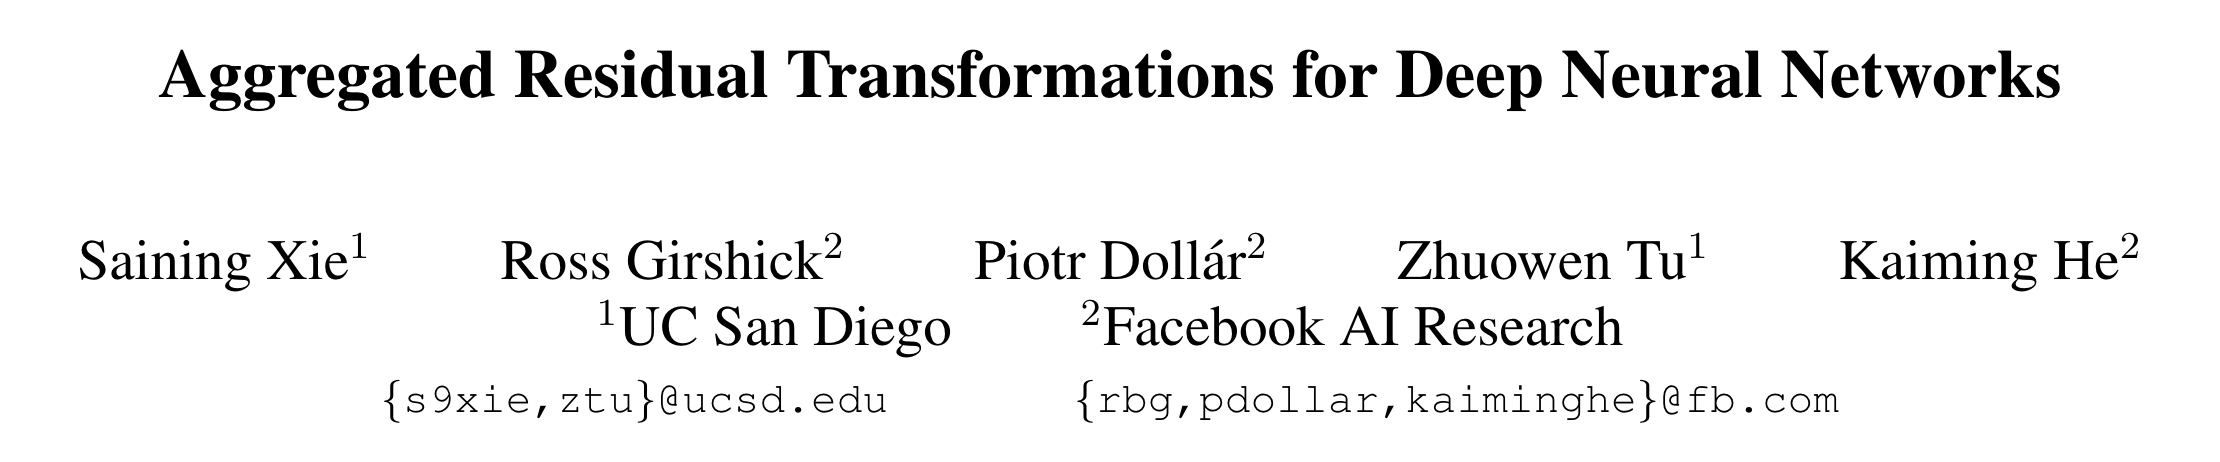

In [ ]:
이제 레이어는 해결됐는데 채널 개수는 어떻게 해야할까? -> 는 다음주로 가자.